# Scikit-Learn Jupyter Notebook
<hr>

<a href="https://scikit-learn.org/stable/tutorial/basic/tutorial.html"> Link to Scikit-Learn Official website</a><p>
https://www.tutorialspoint.com/scikit_learn/index.htm

## Overview
<hr>
<b>Scikit-Learn</b> is a free and useful machine learning library for Python. It contains many efficient unsupervised and supervised learning algorithms. This library also built upon some of the technology that we know like NumPy.

<b>The functionality that scikit-learn provides include:</b>
<ul>
<li><b>Regression</b></li>
<li><b>Classification</b></li>
<li><b>Clustering</b></li>
<li><b>Model selection</b></li>
<li><b>Preprocessing</b></li></ul>

<b>Reference:</b> 
<a href="https://www.codecademy.com/article/scikit-learn">Codecademy</a>

## Nearest Neighbor

https://scikit-learn.org/stable/modules/neighbors.html#

### Nearest Neighbors Classification

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

#### Set Up
<hr>

In [ ]:
# scikit learn
import sklearn as sk

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [ ]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

#### Student Dataset
<hr>

https://archive.ics.uci.edu/ml/datasets/Student+Performance


##### Explaining the columns name
<hr>

<ol>
<li> school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)</li>
<li> sex - student's sex (binary: "F" - female or "M" - male)</li>
<li> age - student's age (numeric: from 15 to 22)</li>
<li> address - student's home address type (binary: "U" - urban or "R" - rural)</li>
<li> famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)</li>
<li> Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)</li>
<li> Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li> Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li> Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")</li>
<li> Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")</li>
<li> reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")</li>
<li> guardian - student's guardian (nominal: "mother", "father" or "other")</li>
<li> traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li> studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li> failures - number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li> schoolsup - extra educational support (binary: yes or no)</li>
<li> famsup - family educational support (binary: yes or no)</li>
<li> paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li> activities - extra-curricular activities (binary: yes or no)</li>
<li> nursery - attended nursery school (binary: yes or no)</li>
<li> higher - wants to take higher education (binary: yes or no)</li>
<li> internet - Internet access at home (binary: yes or no)</li>
<li> romantic - with a romantic relationship (binary: yes or no)</li>
<li> famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li> freetime - free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li> goout - going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li> Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li> Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li> health - current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li> absences - number of school absences (numeric: from 0 to 93)</li>
<b>these grades below are related with the course subject, Math or Portuguese: which our dataset is Portuguese</b>
<li> G1 - first period grade (numeric: from 0 to 20)</li>
<li> G2 - second period grade (numeric: from 0 to 20)</li>
<li> G3 - final grade (numeric: from 0 to 20, output target)</li>
 </ol>

In [30]:
# Load the student data set from a URL.
st = pd.read_csv("https://raw.githubusercontent.com/PantareeBew/EmergingTechAssessment/main/student-por.csv?token=ALQVXCK6HNFNXVPT65XCX6LBZTMPQ", sep=";")

In [31]:
# Have a look at the student data.
st

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [32]:
# Summary statistics.
st.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [33]:
# Checking for Missing Values
st.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Data Visualisation
<hr>

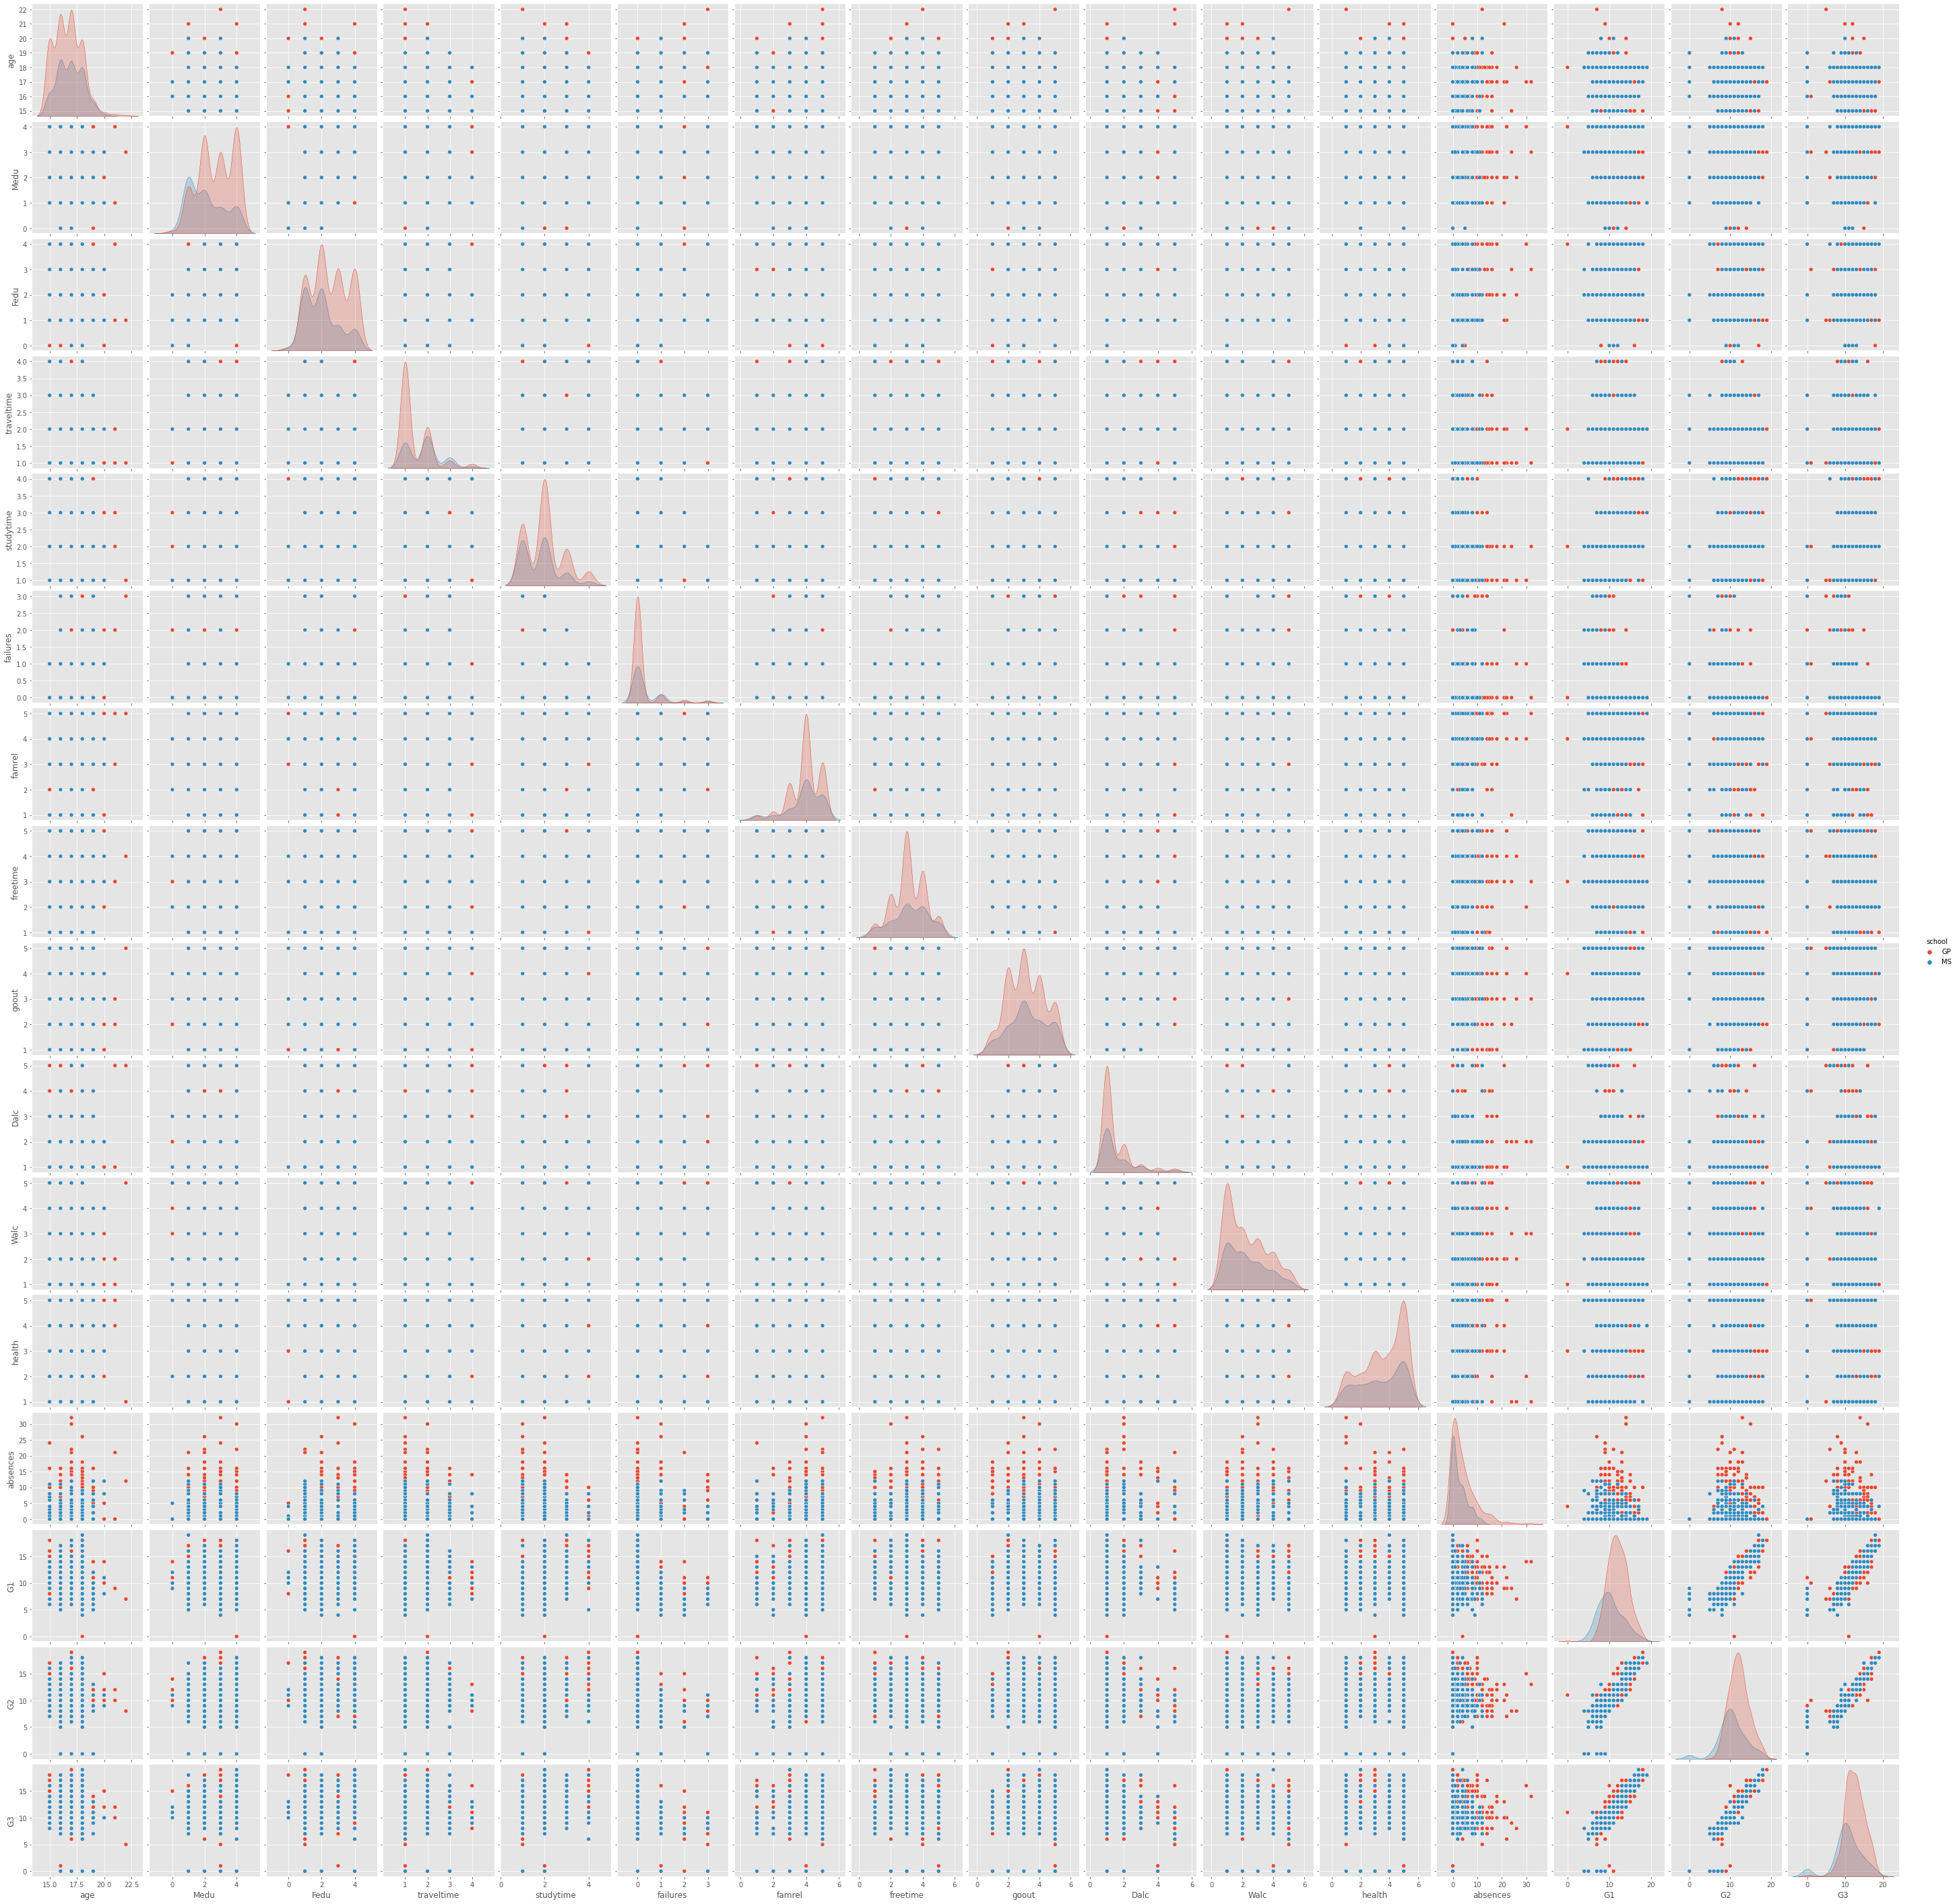

In [38]:
# Scatter plots and kdes.
sns.pairplot(st, hue='school');

##### Two dimensions

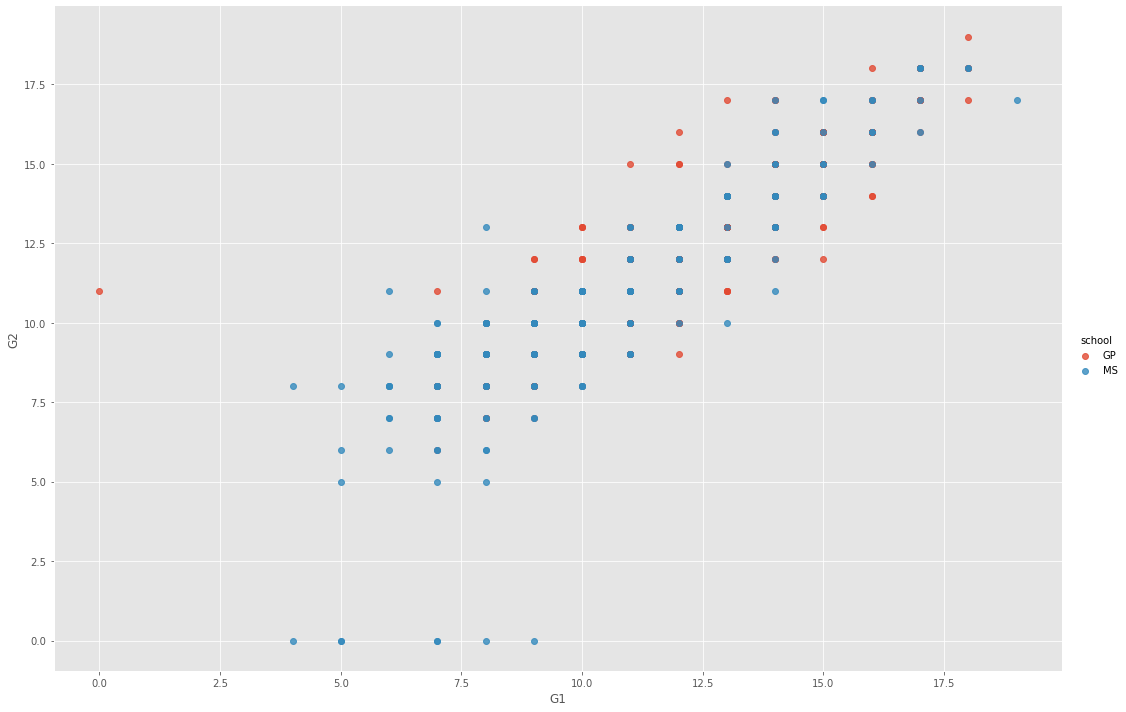

In [49]:
# Seaborn plot 
sns.lmplot(x="G1", y="G2", hue='school', data=st, fit_reg=False, height=10, aspect=1.5);